## Team:
## 1. Nirav Jadeja - B00789139
## 2. Supriya Patel - B00791627

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from keras import backend as K
from keras.applications import VGG16
import numpy as np
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input
from keras.optimizers import SGD

C:\Users\nirav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Function for loading mnist data
#### Test Data is 20% of Train Data.

In [2]:
def load_mnist_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train[:1024]
    y_train = y_train[:1024]

    x_test = x_test[:205]
    y_test = y_test[:205]
    
    return x_train, y_train, x_test, y_test

#### Function for plotting line and bar graph

In [3]:
def lineGraph(firstValue, secondValue, firstMarker, secondMarker,
               lineOne, lineTwo, colorOne, colorTwo, title, 
               labelOne, labelTwo, x_label, y_label):
    
    plt.plot(firstValue, marker=firstMarker, linestyle=lineOne, 
                 color=colorOne, label=labelOne)
    plt.plot(secondValue, marker=secondMarker, linestyle=lineTwo, 
                 color=colorTwo, label=labelTwo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    
def barGraph(labels, values, width, x_label, y_label, title):
    plt.bar(labels, values, width=width)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

## >>> MLP Model <<<

In [4]:
def MLP_data_transform(x_train, y_train, x_test, y_test):
    
    # first reshaping the array, then converting its type to float and normalization
    x_train = x_train.reshape(1024, 784).astype('float32') / 255
    x_test = x_test.reshape(205, 784).astype('float32') / 255
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test

#### validation is 20% of training data

In [5]:
def MLP_model(x_train, y_train, x_test, y_test,
              batch_size, num_classes, epochs ):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2)
    
    score = model.evaluate(x_test, y_test, verbose=0)
    prediction = model.predict_classes(x_test, verbose=0)
    return history, score, prediction

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

x_train, y_train, x_test, y_test = load_mnist_data()
x_train, y_train, x_test, y_test = MLP_data_transform(x_train, y_train, x_test, y_test)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

1024 train samples
205 test samples


In [7]:
history, score, prediction = MLP_model(x_train, y_train, x_test, y_test,
              batch_size, num_classes, epochs)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.20489380018013278
Test accuracy: 0.9268292688741917


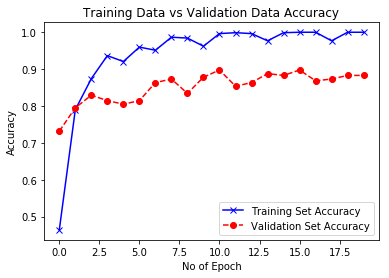

In [8]:
lineGraph(history.history['acc'], history.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Validation Data Accuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

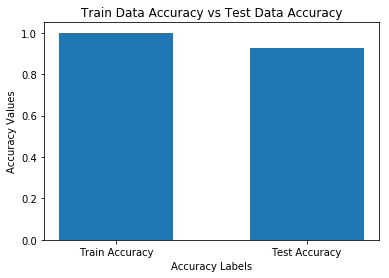

In [9]:
accuracy_values = [history.history['acc'][-1], score[1]]
accuracy_labels = ['Train Accuracy','Test Accuracy']
 
barGraph(accuracy_labels, accuracy_values, 0.6, 'Accuracy Labels',
         'Accuracy Values','Train Data Accuracy vs Test Data Accuracy')

#### Conclusion: Here, we can oberve that training accuracy is higher than validation set (generalization) and test accuracy. Hence, the model is overfitting because of the limited training data.

## >>> CNN Model <<<

In [10]:
def CNN_data_transform(x_train, y_train, x_test, y_test):
    
    # input image dimensions
    img_rows, img_cols = 28, 28
    
    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, input_shape

#### validation is 20% of the data

In [11]:
def CNN_model(x_train, y_train, x_test, y_test,
              batch_size, num_classes, epochs, input_shape):
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_split=0.2)
    score = model.evaluate(x_test, y_test, verbose=0)
    
    prediction = model.predict_classes(x_test, verbose=0)
    return history, score, prediction

In [12]:
batch_size = 128
num_classes = 10
epochs = 12

x_train, y_train, x_test, y_test = load_mnist_data()
x_train, y_train, x_test, y_test, input_shape = CNN_data_transform(x_train, y_train, x_test, y_test)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

1024 train samples
205 test samples


In [13]:
history, score, prediction = None, None, None
history, score, prediction = CNN_model(x_train, y_train, x_test, y_test,
              batch_size, num_classes, epochs, input_shape)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15374324263595954
Test accuracy: 0.9512195121951219


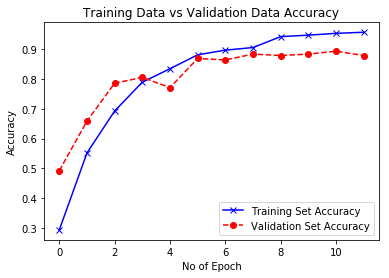

In [14]:
lineGraph(history.history['acc'], history.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Validation Data Accuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

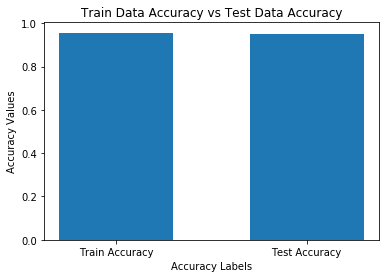

In [15]:
accuracy_values = [history.history['acc'][-1], score[1]]
accuracy_labels = ['Train Accuracy','Test Accuracy']
 
barGraph(accuracy_labels, accuracy_values, 0.6, 'Accuracy Labels',
         'Accuracy Values','Train Data Accuracy vs Test Data Accuracy')

#### Conclusion: In case of CNN, train vs generalization error is less compared to MLP model (previous case). but model is overfitting. It can be reduced with more training data

## >>> VGG16 Model <<<

#### Transforming the MNIST data for VGG16 model input

In [16]:
def VGG16_data_transform(x_train, y_train, x_test, y_test):
    
    input_height, input_width = 28, 28
    input_channels = 3

    x_train = np.dstack([x_train] * 3)
    x_test = np.dstack([x_test]*3)

    x_train = x_train.reshape(-1, input_height, input_width, input_channels)
    x_test = x_test.reshape(-1, input_height, input_width, input_channels)

    x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
    x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])

    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    
    x_train = preprocess_input(x_train)
    x_test = preprocess_input(x_test)
    
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [17]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

x_train, y_train, x_test, y_test = load_mnist_data()
x_train, y_train, x_test, y_test = VGG16_data_transform(x_train, y_train, x_test, y_test)

#### Loading the VGG16 model and its summary

In [18]:
VGG_Model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

VGG_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

#### Adding VGG16 model as a part of other network and turning its layer off.

In [19]:
history, score, model = None, None, None

x = VGG_Model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.15)(x)

# add output layer
predictions = Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=VGG_Model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in VGG_Model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x_train, y_train, epochs=20,verbose=0, shuffle=True, validation_split=0.2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

#### Now, switching on more layers to train

In [20]:
# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:18]:
    layer.trainable = False

for layer in model.layers[18:]:
    layer.trainable = True
    
# training
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=20, verbose=0, shuffle=True,  validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2995272156668873
Test accuracy: 0.5219512206752126


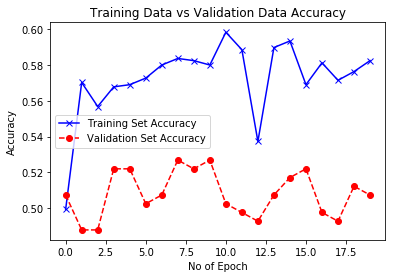

In [21]:
lineGraph(history.history['acc'], history.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Validation Data Accuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

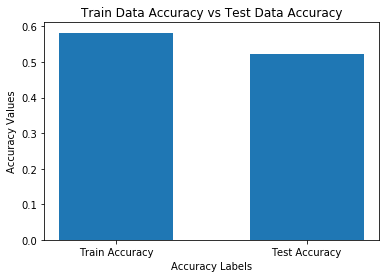

In [22]:
accuracy_values = [history.history['acc'][-1], score[1]]
accuracy_labels = ['Train Accuracy','Test Accuracy']
 
barGraph(accuracy_labels, accuracy_values, 0.6, 'Accuracy Labels',
         'Accuracy Values','Train Data Accuracy vs Test Data Accuracy')

#### Conclusion: In case of new VGG16 network, we can also see overfitting (Train vs Validation Accuracy), which can be reduced by providing more training data and training more layers. But doing this would be expensive in computation.

#### Now let's increase train to 10,000 images and test data to 2,000 images.

In [23]:
history, score, model = None, None, None

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:5000]
y_train = y_train[:5000]

x_test = x_test[:1000]
y_test = y_test[:1000]

x_train, y_train, x_test, y_test = VGG16_data_transform(x_train, y_train, x_test, y_test)

#Load the VGG model
VGG_Model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

x = VGG_Model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.15)(x)

# add output layer
predictions = Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=VGG_Model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in VGG_Model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x_train, y_train, epochs=20,verbose=0, shuffle=True, validation_split=0.2)

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:18]:
    layer.trainable = False

for layer in model.layers[18:]:
    layer.trainable = True

# training
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=20, verbose=0, shuffle=True,  validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9782017970085144
Test accuracy: 0.646


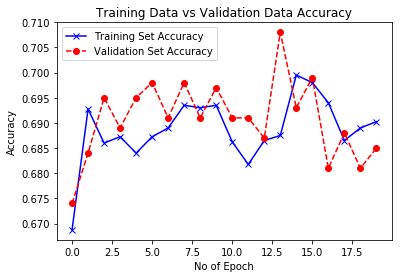

In [24]:
lineGraph(history.history['acc'], history.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Validation Data Accuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

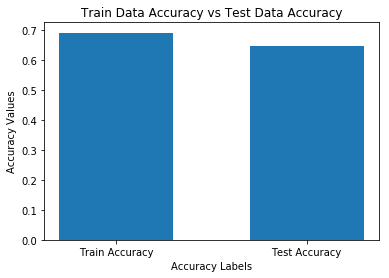

In [25]:
accuracy_values = [history.history['acc'][-1], score[1]]
accuracy_labels = ['Train Accuracy','Test Accuracy']
 
barGraph(accuracy_labels, accuracy_values, 0.6, 'Accuracy Labels',
         'Accuracy Values','Train Data Accuracy vs Test Data Accuracy')

#### Conclusion: Here, with more training and test examples we can say that overfitting is reduced from Train vs Overfitting. In addition, there is an improvement in test accuracy (than with the less training examples).

#### Among all thress models, CNN has less generalized error and improved test accuracy (* these are general observations and it could be changed due to volatile results (according to No Free Lunch)). This can be changed if certain parameters comes in such as more training examples, training more layers, using advance optimization and regularization techniques and so on.